# Student name: Gerard O Connell

# Student ID: 19192118

## Please do not add further imports. If you think an import is missing, please contact your moderator.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Task 1
Describe (in a markdown cell) how a perceptron can be used to classify two objects given their circumference and weight. You may assume that these two features result in linear separability of the two classes in the given dataset. Use the following terms in your description:

* Input space
* Output space
* Unknown target function
* Data set
* Hypothesis set
* Final Hypothesis
* Error measure
* In-sample error
* Out-of-sample error

## Answer

A perceptron is a simple linear classifier that is used for binary classification. It learns to separate two classes using a linear decision boundary. The **input space** comprises all possible feature vectors that can feed into the Perceptron. In our case, the two features are circumference and weight. In the Perceptron, X is the feature, and W is the weight.
The **output space** is the set of possible labels that Perceptron can predict. As our Perceptron is a binary class, the output space is normally Y, which is an element of -1, 1, or Y, which is an element of 0, 1. The Perceptron maps inputs to 1 of these two categories.
The **unknown target function** F (X) represents the true but unknown function that maps inputs to the correct outputs. In our case, we are using weight and circumference, an ideal function that separates them, but we do not explicitly know it. Instead, we collect the data or **dataset** in this case, and we assume there is an underlying pattern that can be learned.
The **dataset** consists of the train examples used to teach the Perceptron. In the code, the dataset will be split 80\20. The test set will be 20 per cent of the data, and the training set will be 80 per cent of the data.
The **hypothesis set** is the set of all possible functions that Perceptron can learn. Since the Perceptron is a linear classifier, all hypotheses in H correspond to a straight-line decision boundary. After training, the Perceptron settles on the **final hypothesis**, a specific function chosen from the hypothesis set. The final function defines the linear decision boundary that separates the two classes in the training data.
The **error measure** is a way to evaluate how well the Perceptron is performing by looking at its mistakes. This helps us understand whether our model is improving during the training and how well it generalises new data. The mathematical function assesses the difference between Perceptron’s predicted outputs and the actual correct outputs for us: E equals the number of misclassified points\total points. That equation represents the examples the Perceptron classified incorrectly.
E in is the **in-sample error** on the training data if the data is linearly separable, the Perceptron can reduce E in to zero after enough iterations. E out is the error on the unseen data E out =**Out-Of-Sample_error**. It measures how well the Perceptron generalises new examples.

# Task 2
Run the code (or observe the provided outputs) in the E-tivity notebook under Task 2. This code implements so-called learning curves that plot the performance of a model (both in-sample as well as out-of-sample) as this model is trained with an increasing number of data points. 

In [3]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_errors = 1- train_scores
    test_errors = 1-test_scores
    
    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Test error")

    
    plt.legend(loc="best")
    return plt

In [4]:
data = np.loadtxt("Et1_Task2.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

## Logistic regression learning curve

In [5]:
cv = ShuffleSplit(n_splits=25, test_size=0.2)

[]

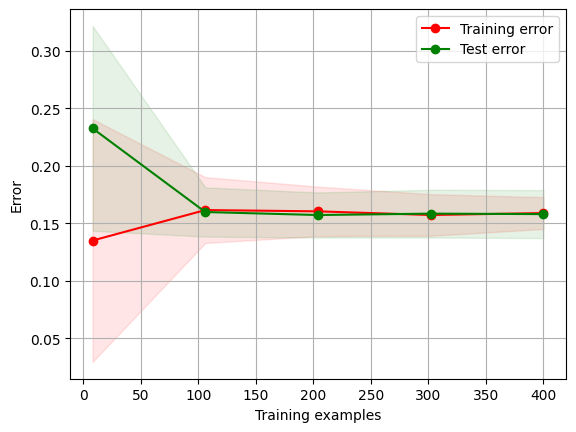

In [6]:
estimator = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5)).plot()

## Neural net learning curves

[]

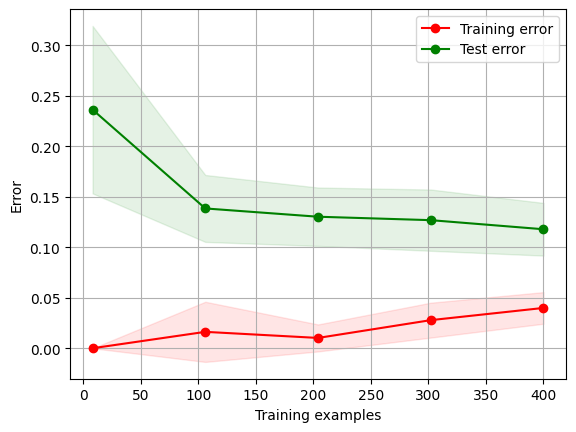

In [7]:
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200, 4), random_state=1)
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5)).plot()

## Describe and Explain
Describe the results of the two learning curves and explain the differences in terms of what you currently understand about the relationship between $E_{in}$ and $E_{out}$ and the number of training samples, N. Provide clear explanations:

- Why the training error is (generally) lower than the test error
- Why the training error increases as the number of training samples is increased
- Which of the two models is the more complex model

## Answer
Training error is generally lower than test error because the model is optimised for training data. The point of a test dataset is to evaluate how well the model generalises to unseen data. The reason training error increases the number of samples increases is with very few training samples, the model can simply memorise the data, so the more samples we have, the more it has to generalise rather than memorise.
In terms of E in, a small training set can be seen in the neural net learning curve. It starts with E in = 0, and the error rate is 0. But this means E out = .26, which is a high number. This is because the model is trained to minimise E in, meaning it fits training data well. It has never seen the test data before, so it performs worse on it. The gap between E in and E out is known as the generalisation gap. E in increases from 0 as more samples are added because it must generalise instead of memorising, and E out should reduce as more training data is added as the model is generalising more effectively, meaning the model is performing better on unseen data.
Out of the two models, the more complex model is the neural net learning model. This is because a linear regression model learns a straight-line decision boundary. It has one layer and a relatively small number of parameters. And the function it learns is simple. While neural networks are non-linear models, they consist of multiple layers of neurons that apply transformations. The function it learns is much more complex due to hidden layers and non-linear activation functions like ReLU or sigmoid instead of just a simple linear function.


# Task 3
In this last task we will explore the impact of the loss/error function on your model. Task 3a focusses on regression and Task 3b on classification. These two tasks will demonstrate the importance of choosing a suitable loss/error function.

## Provided functions

Below functions implement linear regression and linear classification in a closed form (one-step solution using the pseudo-inverse).

In [8]:
def linreg_weights(X,y):
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [9]:
def linreg_predict(w,X):
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    
    # Calculation of outputs given weights and data (X). 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

# Task 3a
Use the code provided in the E-tivity notebook under Task 3a to implement a linear regression algorithm trained on dataset Et1_Task3a.csv.

* Add a function implementing the error function used in linear regression. 
* Provide a mathematical function of the regression lines in terms of the weights found by the linear regression algorithm.
* Plot the regression line together  with the data.
* Quantify the error with the error function you have created.
* In new plots, add one data point to the dataset to illustrate how linear regression responds to outliers.

## Answer

You may add as many cells as you require for your code

In [10]:
data = np.loadtxt("Et1_Task3a.csv", delimiter=",")
X = data[:, :-1]
y = data[:, -1]


In [11]:
def linreg_weights(X, y):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.linalg.inv(X.T @ X) @ X.T @ y


w = linreg_weights(X, y)


In [12]:
def calc_error(w, X, y):

    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    y_hat = X @ w
    mse = np.mean((y - y_hat) ** 2)

    return mse

error = calc_error(w, X, y)
print(f"Mean Squared Error: {error:.4f}")


Mean Squared Error: 0.0043


In [13]:
# Print regression equation
equation = "y = " + " + ".join([f"{w[i]:.2f}x_{i}" for i in range(len(w))])
print("Regression Equation:", equation)


Regression Equation: y = 0.38x_0 + 0.51x_1


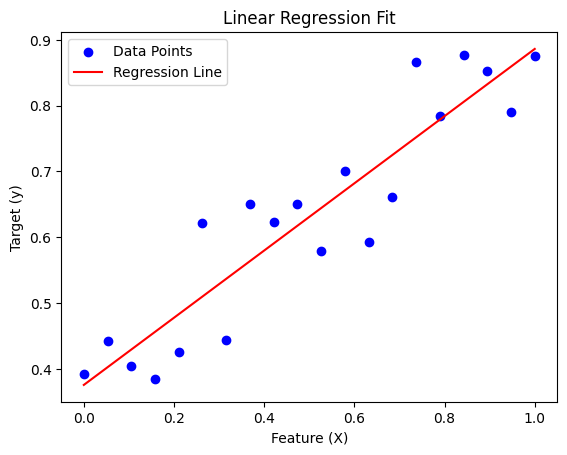

In [14]:
# Scatter plot of data
plt.scatter(X[:, 0], y, color='blue', label="Data Points")

# Generate regression line
x_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_pred = w[0] + w[1] * x_range

# Plot regression line
plt.plot(x_range, y_pred, color='red', label="Regression Line")

# Labels & legend
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


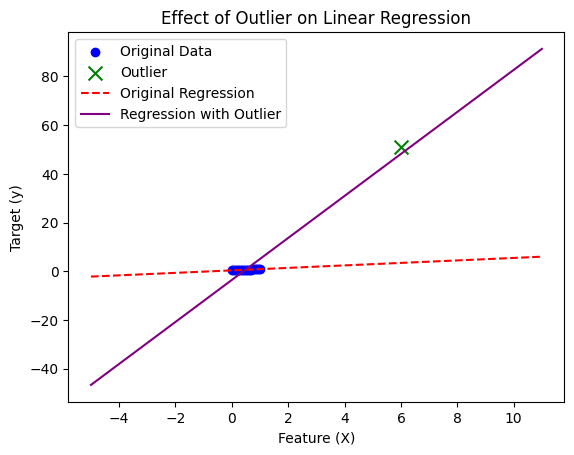

New Mean Squared Error with Outlier: 6.1374


In [15]:
outlier_x = np.array([[max(X[:, 0]) + 5]])
outlier_y = np.array([max(y) + 50])

X_outlier = np.vstack((X, outlier_x))
y_outlier = np.append(y, outlier_y)

w_outlier = linreg_weights(X_outlier, y_outlier)

plt.scatter(X[:, 0], y, color='blue', label="Original Data")
plt.scatter(outlier_x, outlier_y, color='green', marker='x', s=100, label="Outlier")

x_range_extended = np.linspace(min(X[:, 0]) - 5, max(X[:, 0]) + 10, 100)

y_pred_original = w[0] + w[1] * x_range_extended
plt.plot(x_range_extended, y_pred_original, color='red', linestyle="dashed", label="Original Regression")

y_pred_outlier = w_outlier[0] + w_outlier[1] * x_range_extended
plt.plot(x_range_extended, y_pred_outlier, color='purple', label="Regression with Outlier")

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Effect of Outlier on Linear Regression")
plt.legend()
plt.show()

error_outlier = calc_error(w_outlier, X_outlier, y_outlier)
print(f"New Mean Squared Error with Outlier: {error_outlier:.4f}")



## Describe and Explain
Discuss your results and answer the following questions:
* Which data point adds the biggest error term to the optimised error function and how can you quantify this error?
* How do outliers effect linear regression and why?
* Under what circumstances will linear regression with a squared error measure be a good model?

## Answer
The point that is furthest from the regression line has the biggest error term to the optimised error function. Linear regression uses mean square error, and the error term for each data point is squared error = (Ytrue - Y predicted)2.
As minimises squared error and outlier have a disproportionate influence on the slope and intercept, this results in a skewed regression line, making it less representative of the main trend in the data.
It will be a good model if the data has a linear relationship. If there are no extreme values, there are minimal outliers. Sufficient data in a smaller dataset may lead to overfitting or underfitting.


# Task 3b

* Perform a classification using the provided data in Et1_Task3b.csv.
    * Add a function implementing the error function used in linear classification.
    * Use the provided linear regression code to implement linear classification as described in video 3&nbsp;(book Learning from Data, page 89).
    * Plot the output of your classification as a scatter plot with the colour of the data point indicating its class membership.
    * Plot the decision boundary in the same plot using the provided function.
    * Quantify the error with the error function you have created.
* In new (but similar) plots add one data point to the dataset to illustrate how linear classification responds to outliers.
* Add one more plot of the data with decision boundaries for both linear classification and logistic regression.

## Answer

In [16]:
def calc_class_error(w, X, y):
    y_pred = linclass_predict(w, X)
    error = np.mean(y_pred != y)

    return error

In [17]:
def linclass_predict(w, X):
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    return np.sign(X @ w)

In [18]:
def linreg_weights(X, y):
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    return np.linalg.pinv(X.T @ X) @ X.T @ y

In [19]:
data = np.loadtxt("Et1_Task3b.csv", delimiter=",")
X = data[:, :-1]
y = data[:, -1]

w = linreg_weights(X, y)

error = calc_class_error(w, X, y)
print(f"Classification Error: {error:.4f}")


Classification Error: 0.1800


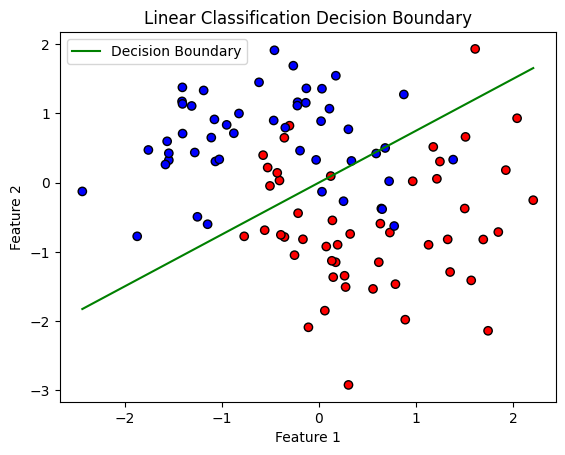

In [20]:
def plot_decision_boundary(w, X, y, title="Linear Classification Decision Boundary"):

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")

    x_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_range = -(w[0] + w[1] * x_range) / w[2]

    plt.plot(x_range, y_range, "g-", label="Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.legend()
    plt.show()

plot_decision_boundary(w, X, y)


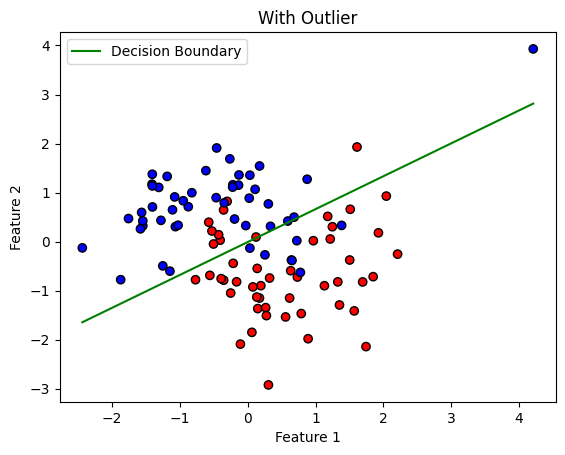

New Classification Error (with Outlier): 0.1584


In [21]:
outlier_x = np.array([[max(X[:, 0]) + 2, max(X[:, 1]) + 2]])
outlier_y = np.array([-1])  # Assign a class

X_outlier = np.vstack((X, outlier_x))
y_outlier = np.append(y, outlier_y)

w_outlier = linreg_weights(X_outlier, y_outlier)

plot_decision_boundary(w_outlier, X_outlier, y_outlier, title="With Outlier")

error_outlier = calc_class_error(w_outlier, X_outlier, y_outlier)
print(f"New Classification Error (with Outlier): {error_outlier:.4f}")


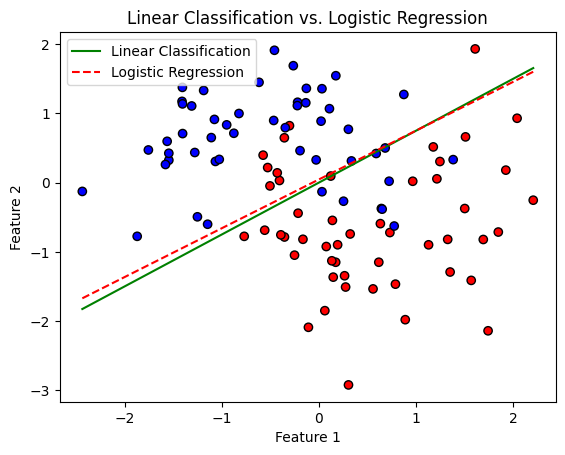

In [22]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")

x_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_range_linear = -(w[0] + w[1] * x_range) / w[2]
plt.plot(x_range, y_range_linear, "g-", label="Linear Classification")

y_range_logistic = -(log_reg.intercept_ + log_reg.coef_[0][0] * x_range) / log_reg.coef_[0][1]
plt.plot(x_range, y_range_logistic, "r--", label="Logistic Regression")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear Classification vs. Logistic Regression")
plt.legend()
plt.show()


In [30]:
def calc_error(w, X, y):

    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    y_hat = X @ w
    mse = np.mean((y - y_hat) ** 2)

    return mse

error = calc_error(w, X, y)
print(f"Mean Squared Error: {error:.4f}")

Mean Squared Error: 0.7062


You may add as many cells as you require for your code

## Describe and Explain
Discuss your results and answer the following:
* Quantify the contribution of the outlier to the overall MSE error.
* Provide an absolute maximum for the contribution of the outlier to the error measure used by logistic regression.&nbsp;
* Is linear classification with mean squared error a suitable classifier? Please provide reasons.

## Answer
The outlier significantly increases the error to the squared term, which amplifies large derivations. The contribution of the outlier to the overall mean square error. In order to measure the outlier impact, we compare the mean square error before and after adding the outlier.
Logistic regression uses the log loss function: L (y,y^)=-ylog(y^)-1(1-y)log(1-y^) for an extreme outlier the predicted probability approaches 0 or 1 leading to L(y,y^)-> infinite. Logistical regression clips probabilities to avoid infinite values L(y,y^) less than or equal to log (2) = 0.693, meaning the absolute maximum contribution of an outlier is 0.693 per sample
No, linear classification with mean square error is not a suitable classifier because mean squared error is designed for regression problems, not classification. There are a few reasons for this, one being that mean squared error, as discussed above, is sensitive to outliers. Mean squared error is designed to measure the difference between continuous values. Classification problems deal with discrete labels, and for binary classification problems it produces 1-1, which does not properly separate classes.


# Reflection
 Once you have completed all tasks in this notebook and have studied all other materials for this E-tivity (resources, lectures and live sessions), answer the following questions.
<ol>
<li>Summarise your understanding of how the Hoeffding bound, the concept of 'shattering', break points and the growth function inform the VC bound for a binary classifier. Also discuss how this relates to the general rule of thumb in machine learning that one needs a number of data points at least equal to 10 times the VC bound.</li>
<li>Summarise your understanding of the approximation-generalisation trade-off in terms of complexity, bias and variance of a model, and the resulting under/overfitting given the available data. </li>
    </ol>

## Answer 
The Hoeffding bound provides a probabilistic guarantee of how well a model trained on a finite dataset generalises to unseen data. It states that the probability of the true error E out deviating significantly from the training error E in decreases exponentially as the number of training samples increases.
Shattering a hypothesis set shatters a set of N points if it can perfectly classify them in all 2n possible labellings. The smallest N for which no set of N points can be shattered is the break point. The growth function measures how many ways a hypothesis set can classify N points. When a breakpoint exists, the growth function is polynomially bounded instead of exponential. The VC dimension is the largest N that can be shattered; if H has a breakpoint, its VC dimension is finite, meaning the model is not too complex and can generalise well.
The approximation generalisation trade-off means high bias, low variance = underfitting, the model is too simple, and this is patterns.
low bias , high variance = overfitting, the model memorises noise instead of generalising. The optimal trade-off is a balance between complexity and data to minimise generalisation errors.
The 10 X rule of thumb suggest that for good generalisation, a machine learning model should be trained on at least 10 times the number of training examples as it’s VC dimension. The rule helps ensure that the model is neither underfitting or overfitting.


<hr style="border:2px solid gray">

# Appendix

## Demonstration of effect of outlier on linear regression decision boundary for comparision with linear classification

Below code demonstrates the effect of an outlier on the decision boundary chosen by logistic regression. You can use this code to compare the effect of outliers in a classification algorithm using mean square error as the error measure with that in a classification algorithm using log likelihood as the error measure. Moreover, below code provides some good hints for plotting the decision boundary in task 3b :-).

Load data:

In [23]:
data = np.loadtxt("Et1_Task3b.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

Fit model:

In [24]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

0.83

Extract weights from model:

In [25]:
w_lr_1 = estimator.intercept_
w_lr_1=np.append(w_lr_1, estimator.coef_)
w_lr_1

array([ 0.07332613,  1.13190106, -1.6084585 ])

Add outlier:

In [26]:
X = np.append(X,[[-2,6]], axis=0)
y = np.append(y,[1],axis=0)

Fit model with outlier:

In [27]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

0.8118811881188119

Extract new weight vector from model:

In [28]:
w_lr_2 = estimator.intercept_
w_lr_2=np.append(w_lr_2, estimator.coef_)
w_lr_2

array([ 0.09418935,  0.96675711, -1.0387864 ])

Plot original and new decision boundary using weight vectors. Decision boundary is defined by equation: $w_0+x_0\cdot w_1+x_1 \cdot w_2=0 \rightarrow x_2 = -\frac{w_0}{w_2}-x_1\frac{w_1}{w_2}$

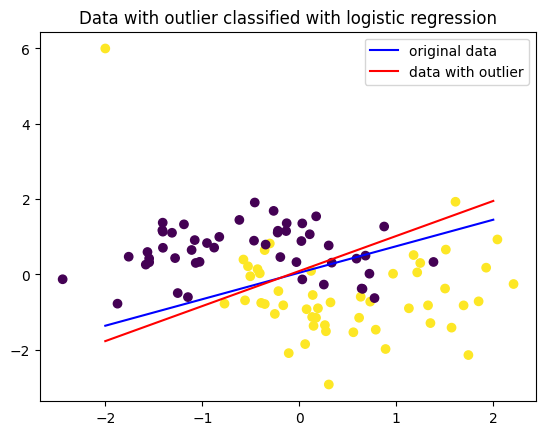

np.float64(0.6237623762376238)

In [29]:
y_p = estimator.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([-2,2],[-w_lr_1[0]/w_lr_1[2]+w_lr_1[1]/w_lr_1[2]*2,-w_lr_1[0]/w_lr_1[2]-w_lr_1[1]/w_lr_1[2]*2],'b',label="original data")
plt.plot([-2,2],[-w_lr_2[0]/w_lr_2[2]+w_lr_2[1]/w_lr_2[2]*2,-w_lr_2[0]/w_lr_2[2]-w_lr_2[1]/w_lr_2[2]*2],'r',label='data with outlier')

plt.title("Data with outlier classified with logistic regression")
plt.legend(loc="upper right")
plt.show()
1-sum(abs(y_p-y))/len(y)